### Visualize random samples

Don't forget to update all paths

In [6]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from io import BytesIO

In [8]:
#dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_train_val.json", "r"))
dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_0904_concat_newimgid_newguid.json", "r"))
print(Counter([dataset[k]['split'] for k in dataset]))
print(len(set([dataset[k]['Guid'] for k in dataset])))
print(Counter([dataset[k]['Qcate'] for k in dataset]))


Counter({'train': 36766, 'test': 7540, 'val': 4966})
49272
Counter({'text': 24343, 'YesNo': 8255, 'Others': 6470, 'choose': 5201, 'number': 2318, 'color': 2058, 'shape': 627})


In [9]:
count = 0
for k in dataset:
    if dataset[k]['Qcate'] == 'text': continue
    for im in dataset[k]['img_posFacts']:
        if 'Litoria caerulea' in im['caption']:
            print("\n", k)
            pprint(dataset[k])
            count += 1
print(count)


 d5c5bcf60dba11ecb1e81171463288e9
{'A': ['"The belly of a Green Tree Frog is white."'],
 'Guid': 'd5c5bcf60dba11ecb1e81171463288e9',
 'Keywords_A': '"white"',
 'Q': '"What color is the belly of a Green Tree Frog?"',
 'Qcate': 'color',
 'img_negFacts': [{'caption': 'Green Tree Frog on verandah tiles 2  Taken in '
                              'Chinchilla at a staff house I was staying at.',
                   'image_id': 30348447,
                   'imgUrl': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Green_Tree_Frog_on_verandah_tiles_2.JPG/800px-Green_Tree_Frog_on_verandah_tiles_2.JPG',
                   'old_image_id': '10325951',
                   'title': 'Green Tree Frog on verandah tiles 2',
                   'url': 'https://commons.wikimedia.org/wiki/File:Green_Tree_Frog_on_verandah_tiles_2.JPG'},
                  {'caption': 'Green Tree Frog - Hyla cinerea, Julie Metz '
                              'Wetlands, Woodbridge, Virginia Green Tree Frog '
         

1


In [10]:
with open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

389750


In [11]:
### Txt-based queries
show_distractors = False

while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] == 'text': break

print(k)
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for f in dataset[k]['txt_posFacts']:
    print(f['fact'])
    print(f['url'])

if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])

d5d5067a0dba11ecb1e81171463288e9
Q =  A TBM, SLBM and ABMs are all types of what?

A =
['Missiles']

------ Positive Evidence ------ 
A tactical ballistic missile (TBM) (or battlefield range ballistic missile (BRBM)) is a ballistic missile designed for short-range battlefield use. Typically, range is less than 300 kilometres (190 mi).
https://en.wikipedia.org/wiki/Tactical_ballistic_missile
Examples of deployed theater missile defenses: Israeli Arrow missile, American THAAD, and Russian S-400 . Targets short-range tactical ballistic missiles, which usually travel at less than 1.5 km/s (3,400 mph). Tactical anti-ballistic missiles (ABMs) have short ranges, typically 20–80 km (12–50 miles).
https://en.wikipedia.org/wiki/Missile_defense
A submarine-launched ballistic missile ( SLBM) is a ballistic missile capable of being launched from submarines. Modern variants usually deliver multiple independently targetable reentry vehicles (MIRVs) each of which carries a nuclear warhead and allows a

d5c4166c0dba11ecb1e81171463288e9
d5cc3c660dba11ecb1e81171463288e9
d5cc3c660dba11ecb1e81171463288e9
Q =  "On the Krusty Burger store sign in Cuenca, Ecuador, which Simpsons characters are featured?"

A =
['"The Simpsons characters featured are Homer and Bart on the Krusty Burger '
 'store sign in Cuenca, Ecuador."']

------ Positive Evidence ------ 
30174997 30174997
https://commons.wikimedia.org/wiki/File:Krosty_Burger_en_Cuenca%2C_Ecuador-_2013-10-12_12-40.jpg
Caption =  Krosty Burger en Cuenca, Ecuador- 2013-10-12 12-40


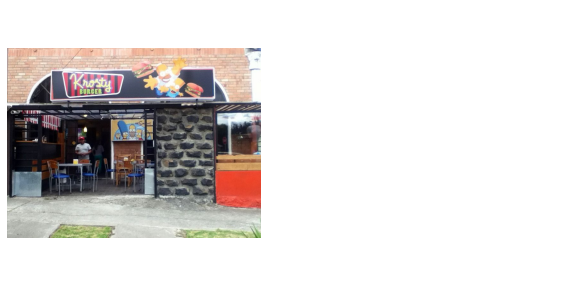

In [12]:
### Image-based queries
show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


for k in dataset:
    #k = random.choice(list(dataset.keys()))
    #if dataset[k]['Qcate'] in Qcate and dataset[k]['split'] == 'test':
    if (not dataset[k]['Qcate'] == 'text') and 'simpson' in dataset[k]['Q'].lower():
        #if random.random()>0.1: continue
        print(k)
k = 'd5cc3c660dba11ecb1e81171463288e9'
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    with open("/data/yingshac/MMMHQA/base64_0904/imgs.tsv", "r") as fp:
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = Image.open(BytesIO(base64.b64decode(img_base64)))    
    ax.imshow(im)
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])